### Project description:
1. In this project, The dataset contains various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. <br>
2. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. So that the distributor know how to best relocate their delivery services to meet the needs of each customer.<br>
3. The dataset can be found on the UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#].

### Structure
#### 1. Data description: 
        > there're 440 samples with 6 features, there's no missing data
#### 2. Data visulization: 
        > Density plots tell the distribution of each feature
        > Heatmap and pairplot tell the correlation of features
        > Decision Tree regression tell the high correlated features with R^2 score
#### 3. Feature engineering: 
        > Box-Cox transform the feature into normal distribution
        > Check transformed Pairplot and Density plot, summary changes of correleted features
        > PCA: reduce the dimension; PCA plot tells the deeper information of data
#### 4. K-means Clustering: 
        > Elbow method chooses the optimal number of cluster
        > Visualize the K-means results
        > Conclusion for constomer segmentation

### Packages loading

In [2]:
#for dataframe processing
import numpy as np
import pandas as pd

#for ploting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#for building decision tree, PCA and Kmeans
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans

### Data uploading

In [3]:
data = pd.read_csv('WholesaleCustomers.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


> For the purpose of the project, drop the first two column 'Channel', 'Region'.<br>
> Then each column represents a category in terms of products the customer could purchase

In [4]:
data.drop(['Channel', 'Region'], axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Data description
> to have a general idea of the data set

In [5]:
data.shape #there're 400 samples with 6 features

(440, 6)

In [6]:
data.isnull().sum(axis=0) #there's no missing data

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


> variances differ among features

### Data Visualization

#### 1. Distrbution for each feature

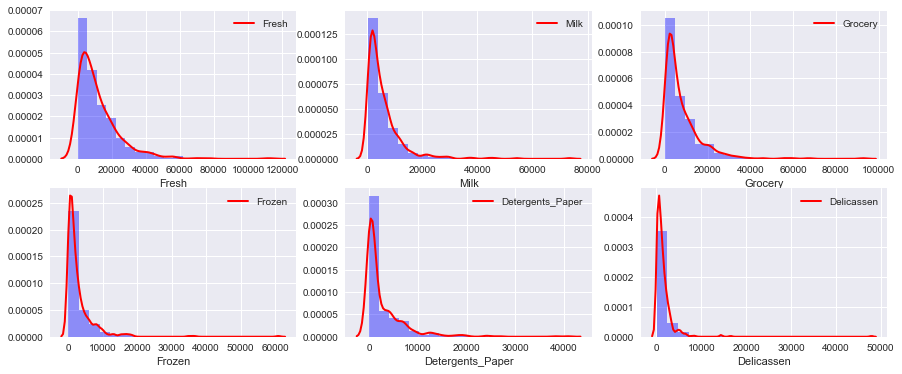

In [58]:
feature = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper', 'Delicassen']
index = 0
plt.figure(figsize=(15,6))
for fea in feature:
    index += 1
    plt.subplot(2,3, index)
    plt.xlabel(fea)
    sns.distplot(data[fea],kde=True,bins=20, color='b', kde_kws={"color": "r", "lw": 2, "label": fea})

    1. Most are skewed to the left where most of the data points lie.
    2. This indicates that normalization is required to make the data deatures normally distributed as clustering algorithms require.

#### 2. Heatmap-correlation among features
> One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing.

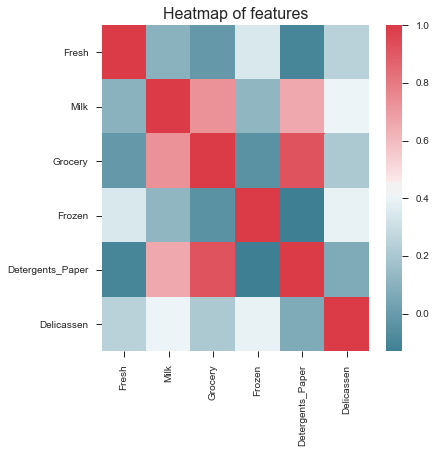

In [31]:
fig, ax = plt.subplots(figsize=(6,6))
plt.title("Heatmap of features",fontsize=16)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap)
plt.show()

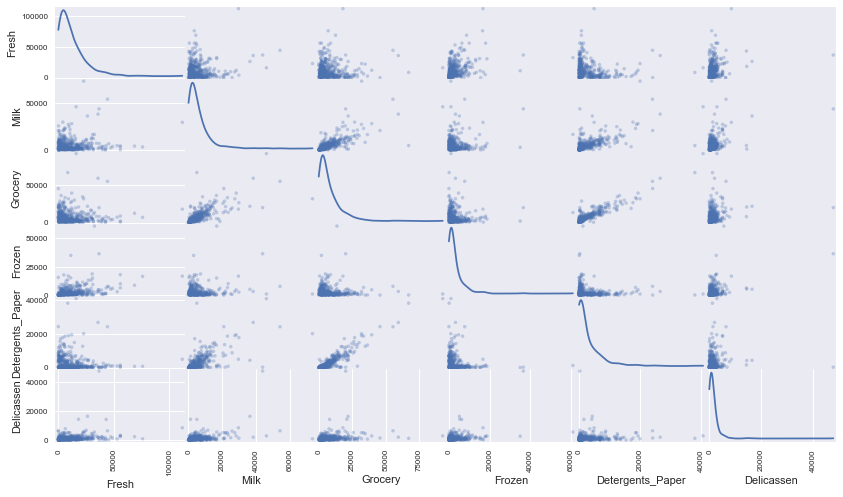

In [64]:
pair_plot=pd.plotting.scatter_matrix(data, alpha = 0.3,figsize = (14,8), diagonal = 'kde')
plt.show()

    1. The following pairs of features seem to have some correlation (seem linear relationship from scatter plots),they are, from strongest to weakest:
           Grocery and Detergents_Paper.
           Grocery and Milk.
           Detergents_Paper and Milk (not too strong).
    2. So, Grocery may not be necessary for indentifying consumers' spending habits.

#### 3. Further insight to feature relevance
> To determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products, we can train a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.<br>
> Using decision tree regressor (others regression models are fine)

In [27]:
features = list(data.columns)
for feature in features:
    new_data = data.drop([feature],axis=1)
    new_feature = pd.DataFrame(data.loc[:,feature])
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size = 0.33, random_state = 42)
    #build tree
    
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    
    #get R^2 score
    score = dt.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(feature, score))

R2 score for Fresh as dependent variable: -0.46268887981366835
R2 score for Milk as dependent variable: 0.18231857766506432
R2 score for Grocery as dependent variable: 0.6362158787134857
R2 score for Frozen as dependent variable: -0.043804735188345045
R2 score for Detergents_Paper as dependent variable: 0.4686496111539748
R2 score for Delicassen as dependent variable: -15.765256919252977


Note from the R2 scores:<br>
1. The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data.<br>
2. "Fresh", "Frozen" and "Delicatessen" as dependent variables have negative R2 scores which imply that they are necessary for identifying customers' spending habits because the remaining features cannot explain the variation in them.<br>
3. Similarly, "Milk" and "Detergents_Paper" have very low R2 scores which imply that they are necessary for identifying customers' spending habits.<br>
4. However, "Grocery" has a R2 score of 0.64, compared to the other features,<font color=red> it maybe not as necessary for identifying customers' spending habits as well as the indication from Heatmap results.</font> 

### Feature Engineering

#### 1. Feature Scaling
> Since the features are not normally distributed and have large skew, we can use <font color=red>Box-Cox test</font> to transform them into normally distributed (reduce skewness). Simpler approach works in most cases would be the natural logarithm.

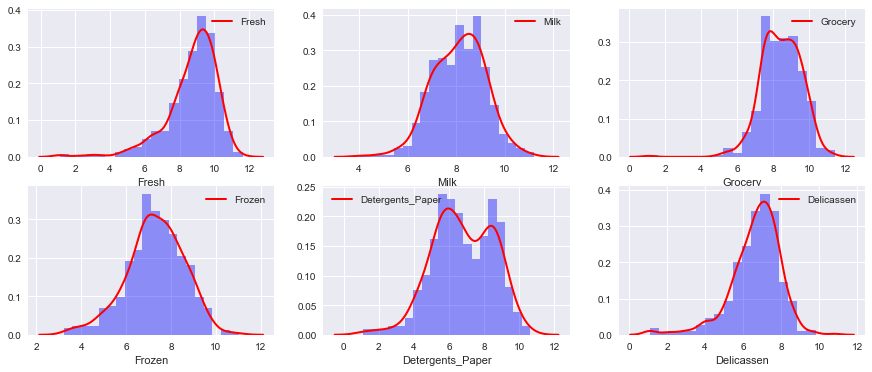

In [65]:
log_data = np.log(data)
feature = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper', 'Delicassen']
index = 0
plt.figure(figsize=(15,6))
for fea in feature:
    index += 1
    plt.subplot(2,3, index)
    plt.xlabel(fea)
    sns.distplot(log_data[fea],hist=True,kde=True,bins=20, color='b', kde_kws={"color": "r", "lw": 2, "label": fea})

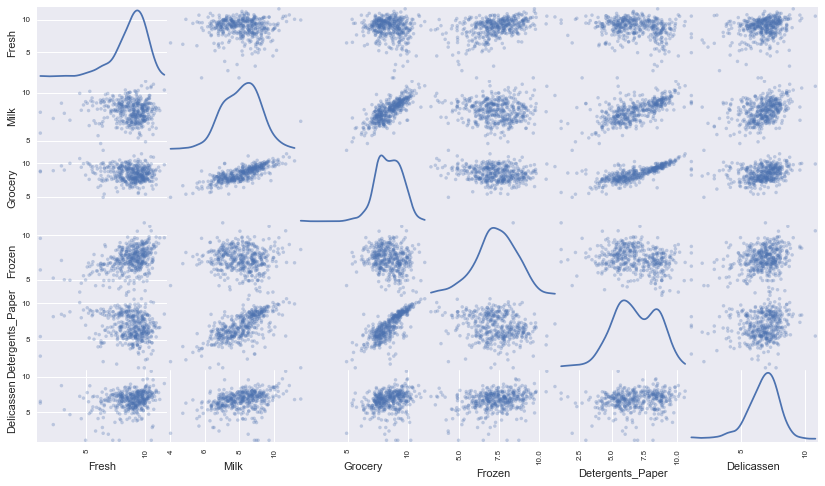

In [66]:
pair_plot=pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

#### Changes in correlations

1. Grocery and Detergents_Paper has a weaker correlation.
2. Grocery and Milk has a slightly stronger correlation.
3. Detergents_Paper and Milk has a slightly stronger correlation.

#### 2.PCA
> Using PCA to discover how many dimensions about the data best maximize the variance of features involved

In [69]:
scaled_data = preprocessing.scale(log_data.T) # let samples be the column
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

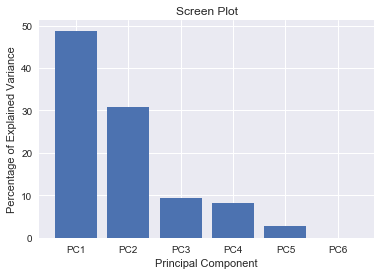

In [70]:
#draw Screen plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel("Principal Component")
plt.title('Screen Plot')
plt.show()

> Most of the variation is along PC1 and PC2 (80%), so a 2-D should do a good job representing the original data.

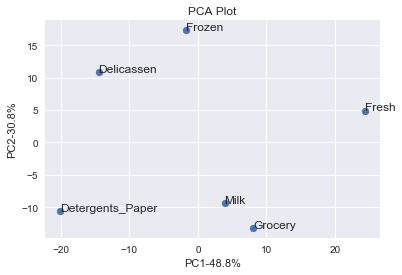

In [72]:
#draw PCA plot
pca_df = pd.DataFrame(pca_data, index = feature, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Plot')
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

#### PCA plot tells that:
1. The first principal component (PC1):<br>
    1)An increase in PC1 is associated with large increases in "Milk", "Grocery" and "Detergents_Paper" spending.<br>
    2)These features best represent PC1.<br>
    3)This is in line with our initial findings where the 3 features are highly correlated.<br>
2. The second principal component (PC2):<br>
    1)An increase in PC2 is associated with large increases in "Fresh", "Frozen" and "Delicassen" spending.<br>
    2)These features best represent PC2.<br>
    3)This makes sense as PC1 represents different features. And in PC2, the features in PC1 have very small positive weights<br>
    
#### Insight thoghts from the PCA plot results:
1. Coffee Cafe: Low spending on "Fresh", "Frozen" and "Delicassen".<br>
    1)Majority of spending on "Grocery", "Milk" and "Detergents_Paper".<br>
    2)With some spending on "Delicassen", it may be a cafe establishment serving drinks, coffee perhaps, with some ready-made food as a complimentary product.
2. Upscale Restaurant: Low spending on "Frozen".<br>
    1)Majority of spending is a mix of "Fresh", "Milk, and "Grocery"<br>
    2)This may be an upscale restaurent with almost no spending on frozen foods.<br>
    3)Most upscale restaurants only use fresh foods.<br>
3. Fresh Food Retailer:Majority of spending is on "Fresh" goods with little spending on everything else except on "Frozen".

### K-means Clustering
> We'll use a K-Means clustering algorithm to identify the various customer segments hidden in the data.

In [73]:
df = pd.DataFrame({'x':pca.components_[0], 'y':pca.components_[1]})

> Elbow method finds the optimal number of clusters

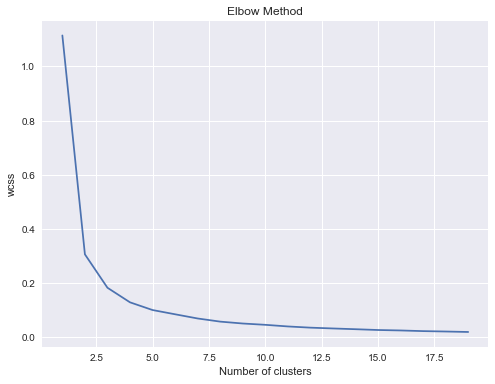

In [84]:
wcss=[]
for i in range(1,20):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

> Fitting kmeans to the dataset with k=2 clusters

In [80]:
km2=KMeans(n_clusters=2)
km2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

> visualize the result

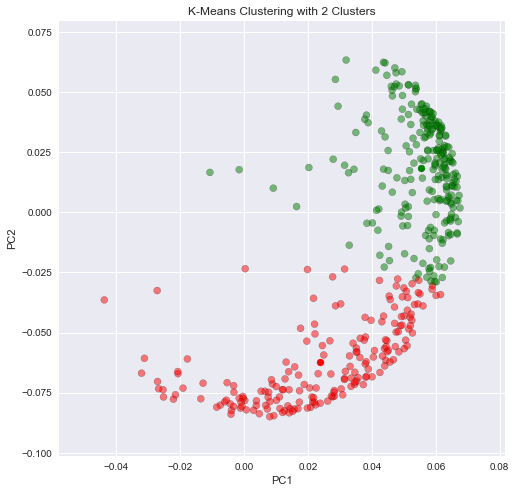

In [85]:
labels = km2.predict(df)
centroids = km2.cluster_centers_

fig = plt.figure(figsize=(8, 8))
colmap={1: 'r', 2: 'g', 3:'b'}
colors = map(lambda x: colmap[x+1], labels)
colors1=list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.title('K-Means Clustering with 2 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

> The same method, we can try to fit kmeans to the dataset with k=3 clusters

In [82]:
km3=KMeans(n_clusters=3)
km3.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

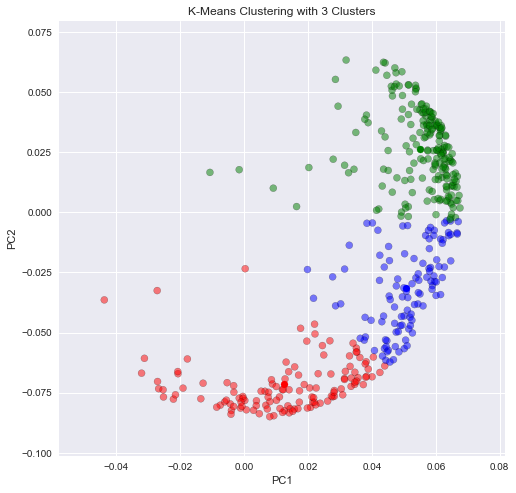

In [86]:
labels = km3.predict(df)
centroids = km3.cluster_centers_

fig = plt.figure(figsize=(8, 8))
colmap={1: 'r', 2: 'g', 3:'b'}
colors = map(lambda x: colmap[x+1], labels)
colors1=list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Conclusions from 3 clusters
1. It is evident that customers who have highly spending on "Milk", "Grocery" And "Detergents_Paper" belong to <font color = red>red cluster</font>. 
2. It is evident that customers who have highly spending on "Fresh" and "Frozen"  belong to <font color = green>green cluster</font>. (like coffee cafe customers)
3. The bule cluster is tricky to describe. Customers whose spend on "Milk", "Grocery" is a slightly high, and spending on "Fresh" is high too (like resturant customers), belong to <font color = blue>blue cluster</font>. 